### Plotting the Food Dollar Farm Share Over Time

This notebook creates a figure showing the farm share and marketing share of the food dollar over time. The data were obtained from the USDA-ERS' [Food Dollar Series](https://www.ers.usda.gov/data-products/food-dollar-series/download-the-data).

Click the badge below to open in Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chuckgrigsby0/agec-370/blob/main/notebooks/03_plot_food_dollar_farm_share.ipynb)

We first import the necessary libraries and load the data


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base URL for raw GitHub content
base_url = "https://raw.githubusercontent.com/chuckgrigsby0/agec-370/main/data/"

# Load monthly steer price data directly from GitHub URL
fd = pd.read_csv(base_url + 'food_dollar_real_ers.csv')


Next, we filter the data to include only the `Food dollar` table and the relevant farm share categories. We then pivot the data to have separate columns for `Total` and `Farm share`, and calculate the `Marketing` share as the difference between `Total` and `Farm share`. 

#### Filter data and pivot to wide format

In [73]:
farm_share_filter = ['Total', 'Farm share']

fd_clean = fd.query(
    "(Table_name == 'Food dollar') & "
    "(Units == 'Cents per Domestic Real Food Dollar') & "
    "(Category_desc in @farm_share_filter)").reset_index(drop=True)

In [74]:
# Pivot the data wider so Total and Farm share become separate columns
fd_wide = fd_clean.pivot(index='Year', columns='Category_desc', values='Total').reset_index()

# Calculate Marketing as Total - Farm share
fd_wide['Marketing'] = fd_wide['Total'] - fd_wide['Farm share']

### Melting the data for plotting

Finally, we prepare the data for plotting by re-pivoting/melting it into long format, converting cents to dollars, and create a line plot showing the farm share and marketing share of the food dollar over time.

In [75]:
# Now pivot back to long format for plotting
fd_plot = fd_wide.melt(
    id_vars='Year', 
    value_vars=['Farm share', 'Marketing'],  # Only include these two for plotting
    var_name='farm_share', 
    value_name='Value'
)

# This sorts the data by year and farm share category
fd_plot.sort_values(by=['Year', 'farm_share'], inplace=True)

### Convert cents to dollars

In [76]:
fd_plot['Value'] = fd_plot['Value'] / 100  # Convert cents to dollars

### Create Figure

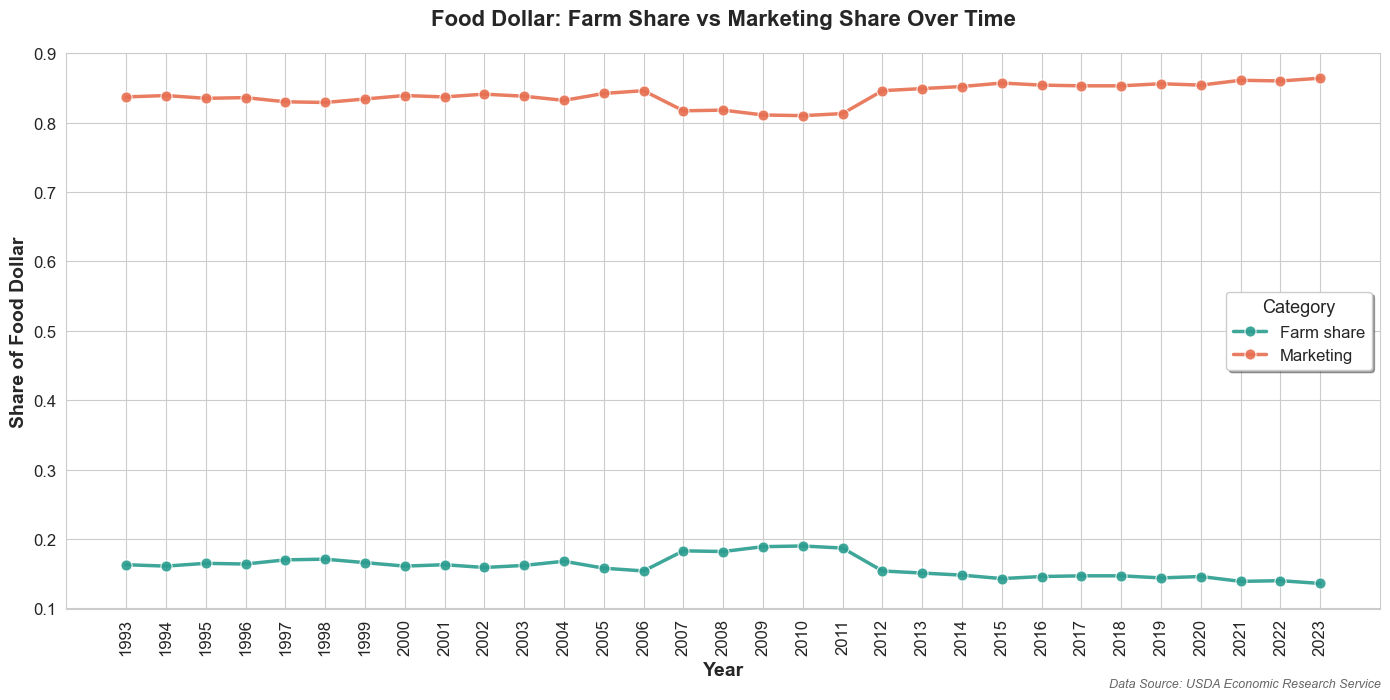

In [77]:
# Set seaborn style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(14, 7))

# Define color palette
# Color scheme: teal for farm share, coral for marketing
colors = {'Farm share': '#2A9D8F', 'Marketing': '#E76F51'}

# Create line plot
sns.lineplot(
    data=fd_plot, 
    x='Year', 
    y='Value', 
    hue='farm_share',
    palette=colors,
    marker='o',           # Circular markers at each data point
    markersize=8,         # Slightly larger markers for visibility
    linewidth=2.5,        # Thicker lines for better visibility
    alpha=0.9             # Slight transparency 
)

# Enhance title with better formatting
plt.title(
    'Food Dollar: Farm Share vs Marketing Share Over Time',
    fontsize=16, 
    fontweight='bold',
    pad=20                # Add padding above title
)

# Improve axis labels
plt.ylabel('Share of Food Dollar', fontsize=14, fontweight='semibold')
plt.xlabel('Year', fontsize=14, fontweight='semibold')

# Set x-axis to show every year and rotate labels 90 degrees
years = fd_plot['Year'].unique()
plt.xticks(years, rotation=90, fontsize=12)

# Improve y-axis tick labels
plt.yticks(fontsize=12)

# Enhance legend with better positioning and styling
plt.legend(
    title='Category',
    title_fontsize=13,
    fontsize=12,
    loc='best',           # Automatically find best position
    frameon=True,         # Add frame around legend
    shadow=True,          # Add subtle shadow
    fancybox=True         # Rounded corners on legend box
)

# Add a subtle note about data source
plt.figtext(
    0.99, 0.01, 
    'Data Source: USDA Economic Research Service', 
    ha='right', 
    fontsize=9, 
    style='italic',
    alpha=0.7
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [78]:
# Percentage change in farm share from 1993 to 2023
filter_1993 = (fd_plot['Year'] == 1993) & (fd_plot['farm_share'] == 'Farm share')
farm_share_1993 = fd_plot[filter_1993]['Value'].values[0]

filter_2023 = (fd_plot['Year'] == 2023) & (fd_plot['farm_share'] == 'Farm share')
farm_share_2023 = fd_plot[filter_2023]['Value'].values[0]
pct_change = np.round((farm_share_2023 - farm_share_1993) / farm_share_1993 * 100, 4)

print(f''' Percentage change in Farm Share from 1993 to 2023: {pct_change}%''')

 Percentage change in Farm Share from 1993 to 2023: -16.5644%


In [92]:
marketing_share_to_farm_share = fd_plot.loc[fd_plot['Year'] == 2023]['Value'].values[1]/fd_plot.loc[fd_plot['Year'] == 2023]['Value'].values[0]
print(f'''In 2023, the marketing share is {np.round(marketing_share_to_farm_share, 2)} times the farm share.''')

In 2023, the marketing share is 6.35 times the farm share.
